<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
#sum of y nulls
y.isnull().sum()

MEDV    0
dtype: int64

In [5]:
#index
X.index

RangeIndex(start=0, stop=506, step=1)

In [6]:
#data types are all floats, no need to change anything
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [7]:
y.dtypes

MEDV    float64
dtype: object

In [8]:
#shape
X.shape

(506, 13)

In [9]:
#shape of MEDV was (506,1), so needed to alter it so the shape would be (506,)
y.shape
y=y['MEDV']

In [10]:
#summary statistics
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
#unique values - are all 506; clean data
X.apply(pd.value_counts).sum()

CRIM       506.0
ZN         506.0
INDUS      506.0
CHAS       506.0
NOX        506.0
RM         506.0
AGE        506.0
DIS        506.0
RAD        506.0
TAX        506.0
PTRATIO    506.0
B          506.0
LSTAT      506.0
dtype: float64

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [12]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

#here i concatenate the data so that I can compare MEDV predictor's correlation with the rest of the dataset
#then I did the absolute value and took the top 4 by sorting values 
#LSTAT, RM, PTRATIO, INDUS
full_data = pd.concat([X, y], axis=1).reindex(X.index)
np.abs(full_data.corr()['MEDV']).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [13]:
#separating the dataframe for predictors, this will be the new X
X_pred = X[['INDUS', 'RM', 'PTRATIO', 'LSTAT']]

#fit and score
ypred=lreg.fit(X_pred, y).score(X_pred, y)
ypred

0.6786434855761494

In [14]:
#make a new column with predictions
X['PREDICTIONS']=lreg.predict(X_pred)

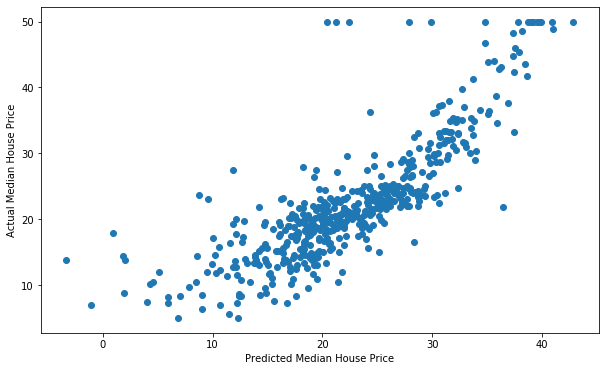

In [15]:
#Plotting the lreg.predict(X) against the actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X['PREDICTIONS'],y)
plt.xlabel('Predicted Median House Price')
plt.ylabel('Actual Median House Price')
plt.show()

#This plot shows that though a good portion of the data lies close to the prediction line, 
#The score indicates that .679 of the data can be described through the predictions. 
#The plot also indicates that there is a good amount of outliers, but there is still a general trend. 

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#creating a training and testing set 
X_ptrain, X_test, y_train, y_test = train_test_split(X_pred,y, test_size=0.3, random_state=2020)

In [18]:
#Fitting on the training set, and then scoring on the training set to compare scores later 
lreg.fit(X_ptrain, y_train) 
lreg.score(X_ptrain, y_train) #training score = 0.6915942373856212

0.6915942373856212

In [19]:
#Scoring on the test set to compare with training score
lreg.score(X_test, y_test)
#70/30 test score = 0.6349572592261996, lower than the training score, indicating overfitting/high variance

0.6349572592261996

In [20]:
#here I'm saving another column for predictions for 70/30 test to later scatter plot
X['PREDICTIONS2']=lreg.predict(X_pred)

In [21]:
#a new train/test set for 90/10, and keeping the random state to avoid confusion
X_ptrain, X_test, y_train, y_test = train_test_split(X_pred,y, test_size=0.1, random_state=2020)

In [22]:
#fit/score on new training set 
lreg.fit(X_ptrain, y_train)
lreg.score(X_ptrain, y_train) #training score is 0.6779440942601123


0.6779440942601123

In [23]:
#score on test set
lreg.score(X_test, y_test) #90/10 test score = 0.6603565457791141 

#the test score is lower, than training score, but pretty close

0.6603565457791141

In [24]:
#here I'm saving another column for predictions for 90/10 test to later scatter plot
X['PREDICTIONS3']=lreg.predict(X_pred)

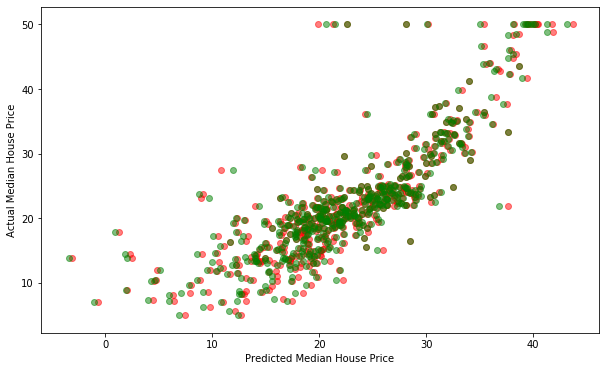

In [25]:
plt.figure(figsize=(10, 6))
#plt.scatter(X['PREDICTIONS1'],y)
plt.scatter(X['PREDICTIONS2'], y=y, color='red', alpha=.5)
plt.scatter(X['PREDICTIONS3'], y=y, color='green', alpha=.5)
plt.xlabel('Predicted Median House Price')
plt.ylabel('Actual Median House Price')
plt.show()

In [26]:
#the the training score on 70/30 was 0.6915942373856212 and the test score on 70/30 was 0.6349572592261996
#while close, the test score being less than the training score indicates some overfitting and therefore high variance 
#when looking at 90/10, the training score was 0.6779440942601123 and the test score was 0.6603565457791141 
#these numbers are much closer than the 70/30, which indicates a lower variance than 70/30 
#while not in all cases, a larger training set split was able to give us a more accurate model 

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [27]:
from sklearn.model_selection import cross_val_score 

In [36]:
#foldn would be created to make an index and to loop through 
#scores was made to append all of the scores per index
#For loop created to loop through foldn, flipping from 5-10 folds and changing cv

foldn = [5,6,7,8,9,10]
scores= []

for k in foldn: 
    score = cross_val_score(estimator=lreg, X=X_pred, y=np.log(y), cv=k)
    scores.append(score.mean())
    
scores #Scores continue to decrease
#the score of X_pred and y was 0.6782763380841345, significantly higher than the ones in the folds
#this means the scores in the folds have high variance, and that the models are overfitting 
#the more folds the more outliers impact the score because there are fewer data for each fold. 

[0.5478386072609606,
 0.5417762327857392,
 0.47063268123733054,
 0.4006566863625518,
 0.44390850891552497,
 0.3064438086302106]

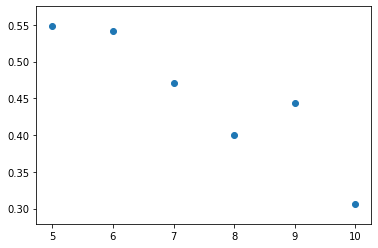

In [29]:
plt.scatter(x=foldn, y=scores); #plot shows generally the more folds, the lower the score got


## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [30]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                   1.38e-321
Time:                        14:02:13   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [32]:
# Check out variable relations
import seaborn as sns

In [33]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

You can read more about it here: https://patsy.readthedocs.io/en/latest/

In [34]:
import patsy

# Use the patsy library to run a regression model on the housing dataset
